In [1]:
import pandas as pd
from string import punctuation

resenha = pd.read_csv("imdb-reviews-pt-br.csv")

display(resenha)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [2]:
from sklearn.model_selection import train_test_split
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                             resenha.sentiment,
                                                              test_size=0.2,
                                                             random_state = 43)

In [3]:
treino

32981    As estatísticas deste filme foram bem pesquisa...
22612    Este é um filme que toda criança deve ver ante...
15694    "Hoppity Goes to Town" foi o segundo e último ...
33695    ... em uma comediante edadiana de outra forma ...
9722     Este é um filme da família ambientado na Améri...
                               ...                        
25233    Eu escolhi ver esse filme porque ele conseguiu...
18448    Meu marido e eu assistimos a esta noite passad...
40753    Primeiro, serei o primeiro a admitir que o pró...
19776    Eu sou um grande fã de filmes de ação grandes,...
14148    Eu concordo com o que mallicka.b disse. O film...
Name: text_pt, Length: 39567, dtype: object

In [4]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [5]:
classificacao = resenha["sentiment"].replace(['neg', 'pos'], [0,1])
resenha["classificacao"] = classificacao

In [6]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [7]:
#DataFrame.sparse.from_spmatrix
#from sklearn.spmatrix import sparse
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)

#pandas.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [8]:
vetorizar.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [9]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                     columns=vetorizar.get_feature_names())

In [10]:
#bag of words
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
vetorizar = CountVectorizer(lowercase=False, max_features = 100) #função que cria uma matriz com a contagem de cada palavra
#também utiliza-se a max_feautres pra limitar as palavras que irão ser contadas, reduzindo o uso computacional
bag_of_words = vetorizar.fit_transform(resenha.text_pt) #criação da matriz de bag of words na coluna de críticas
print(bag_of_words.shape)

(49459, 100)


In [12]:
matriz_esparsa2 = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                     columns=vetorizar.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
matriz_esparsa2

,Ele,Este,Eu,Mas,Não,Os,Se,ainda,alguns,anos,...,todos,tudo,tão,um,uma,ver,vez,vi,vida,você
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,3,2,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,1,0,0,4,2,4,0,1,0,1
2,0,0,1,0,2,1,0,0,0,0,...,1,1,1,3,2,0,1,0,0,2
3,0,1,2,1,0,1,0,1,0,1,...,2,0,0,7,4,1,0,1,0,1
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,1,0,0,2,0,0,0,0,0,...,0,1,0,2,1,0,0,0,0,0
49455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
49456,2,1,1,1,0,0,0,0,1,0,...,1,0,1,12,3,0,0,1,0,2
49457,0,0,1,0,0,0,1,0,1,4,...,0,0,0,4,1,2,0,0,0,2


In [14]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             resenha.classificacao,
                                                              test_size=0.2,
                                                             random_state = 43)
#separação de treino e teste novamente

In [15]:
#fit de regressão logística
from sklearn.linear_model import LogisticRegression
#funcao
def classificar_texto(texto, coluna_texto, coluna_classificao):
    vetorizar = CountVectorizer(lowercase=False, max_features = 50) #função que cria uma matriz com a contagem de cada palavra
    #também utiliza-se a max_feautres pra limitar as palavras que irão ser contadas, reduzindo o uso computacional
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto]) #criação da matriz de bag of words na coluna de críticas
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             texto[coluna_classificao],
                                                              test_size=0.2,
                                                             random_state = 43)
    regressao_log = LogisticRegression(solver='lbfgs')
    regressao_log.fit(treino, classe_treino)
    return regressao_log.score(teste, classe_teste)

print(classificar_texto(resenha,'text_pt','classificacao'))

0.6507278608976951


In [16]:
from wordcloud import WordCloud
%matplotlib inline

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
len(todas_palavras)
nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(todas_palavras)

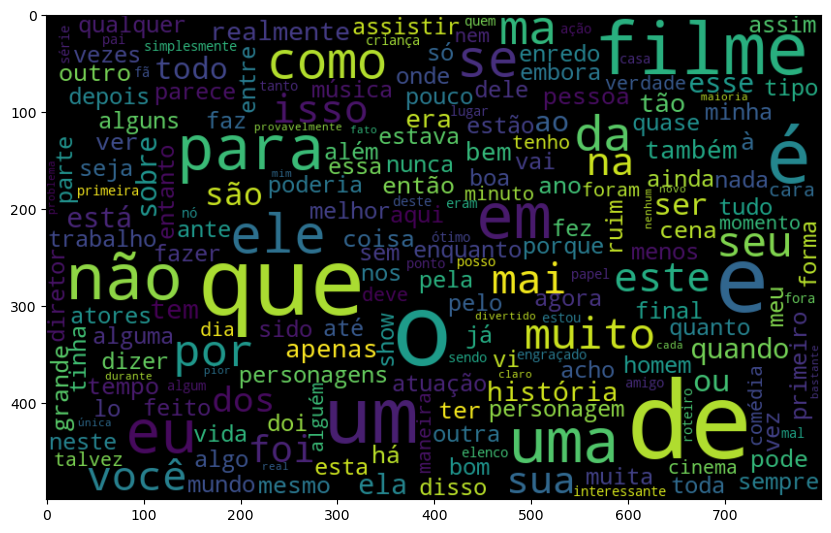

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis=("off")
plt.show()

In [18]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")

    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    len(todas_palavras)
    nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(todas_palavras)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis=("off")
    plt.show()
    
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")

    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    len(todas_palavras)
    nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(todas_palavras)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis=("off")
    plt.show()

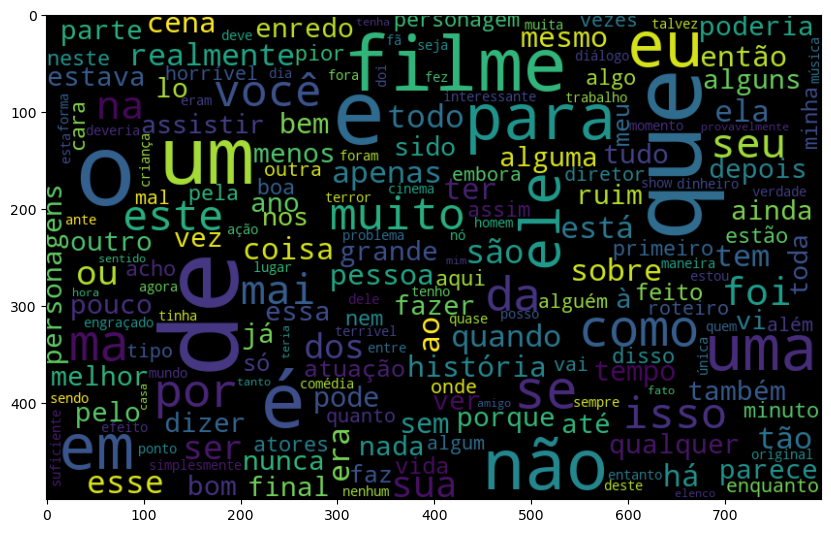

In [19]:
nuvem_palavras_neg(resenha, 'text_pt')

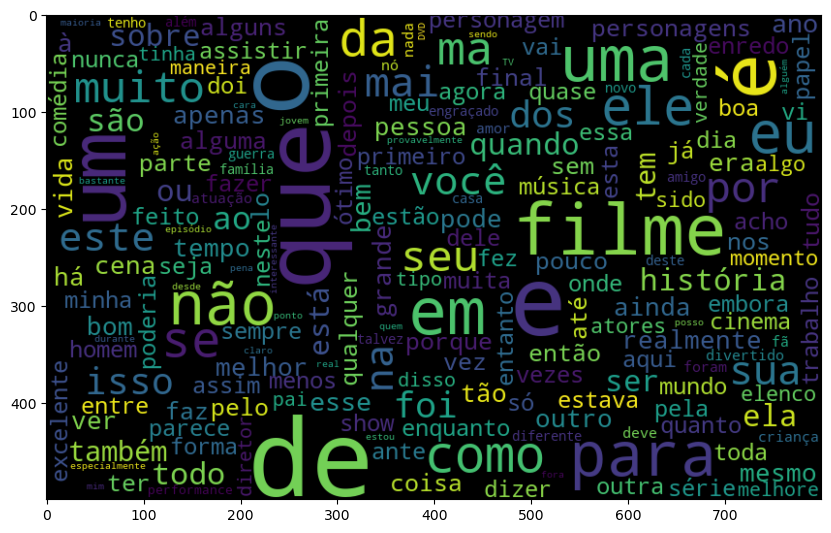

In [20]:
nuvem_palavras_pos(resenha, 'text_pt')

In [21]:
import nltk

In [22]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\lucas.costa\

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    |

True

In [23]:
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [24]:
#tokenização
from nltk import tokenize
frase = "Teste do tokenizer no PLN"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Teste', 'do', 'tokenizer', 'no', 'PLN']

In [25]:
#tokenização + frequência de palavaras
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [26]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})
df_frequencia.nlargest(columns = "Frequência", n = 15)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [27]:
df_15 = df_frequencia.nlargest(columns = "Frequência", n = 15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


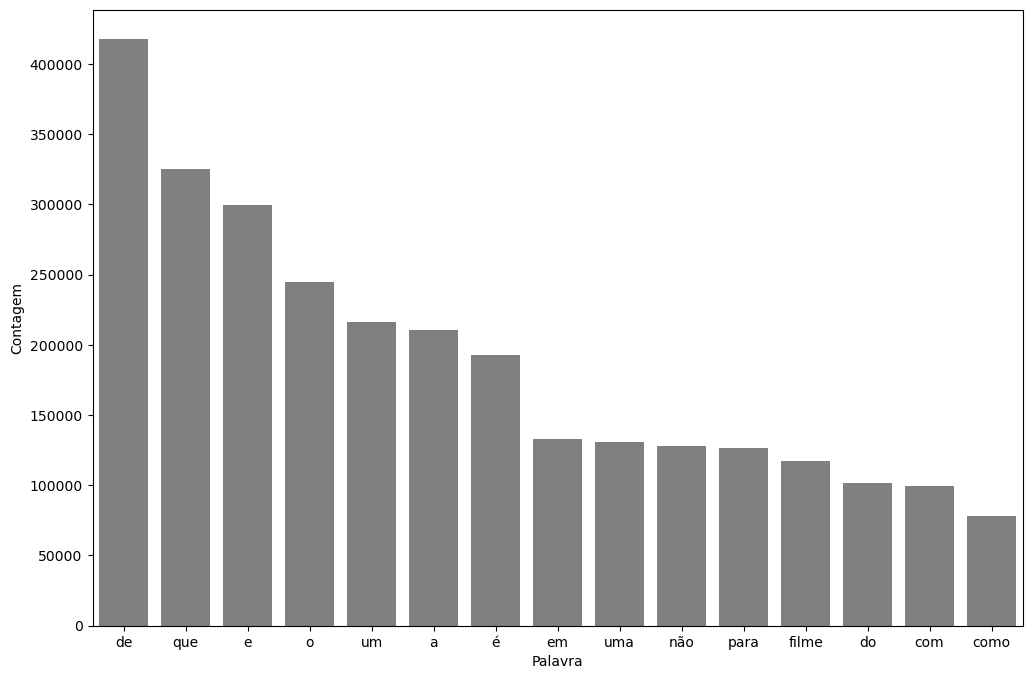

In [28]:
#gráfico de pareto
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_15, x="Palavra", y="Frequência", color="gray")
ax.set(ylabel="Contagem")
plt.show()

In [29]:
#função para tokenizar e criar gráfico
from nltk import tokenize
import seaborn as sns
def cria_pareto (texto_df, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto_df[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})
    df_quantidade = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_quantidade, x="Palavra", y="Frequência", color="gray")
    ax.set(ylabel="Contagem")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


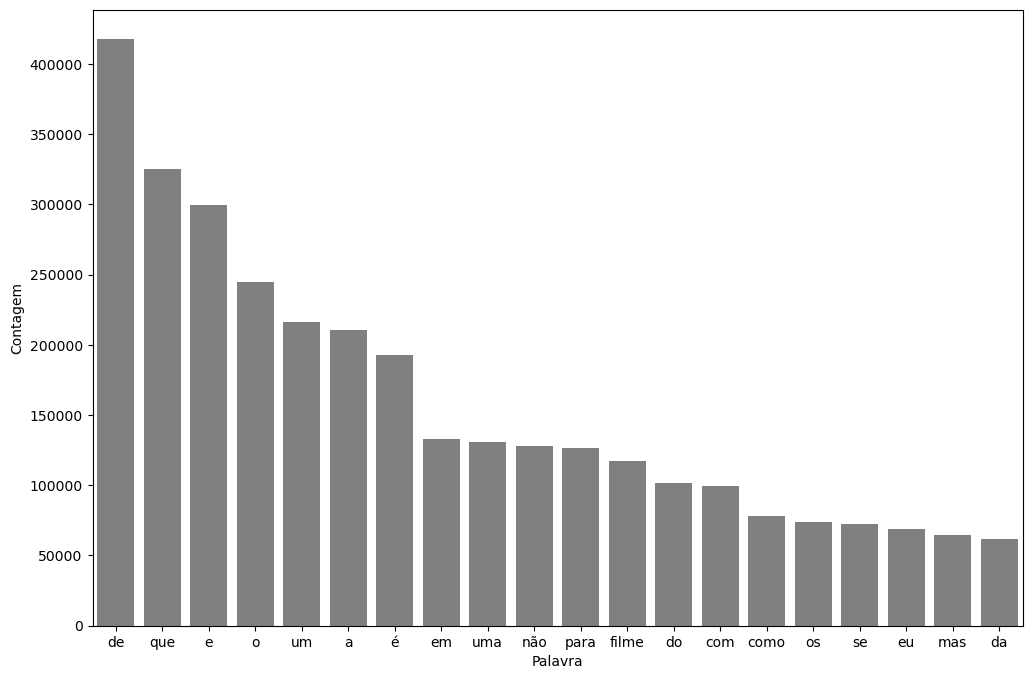

In [30]:
cria_pareto(resenha, "text_pt", 20)

In [31]:
#remoção de stop words - palavras que não agregam
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()

#loop para remover stop words de cada frase
for critica in resenha.text_pt:
    #lista que receberá a frase
    nova_frase = list()
    #tokenizaçao da frase da iteraçao
    palavras_texto = token_espaco.tokenize(critica)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))    

resenha['tratamento_1'] = frase_processada

In [32]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


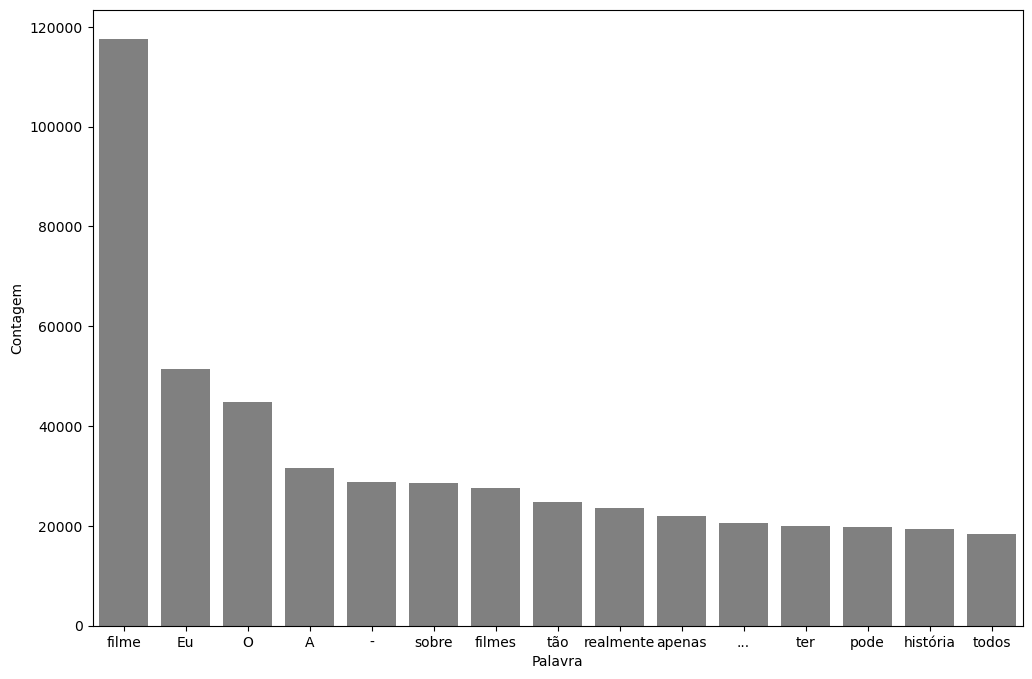

In [33]:
cria_pareto(resenha, "tratamento_1", 15)

In [34]:
pontuacao = list()
token_pontuacao = tokenize.WordPunctTokenizer()
punctuation = punctuation + "..."
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()

for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [35]:
resenha

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


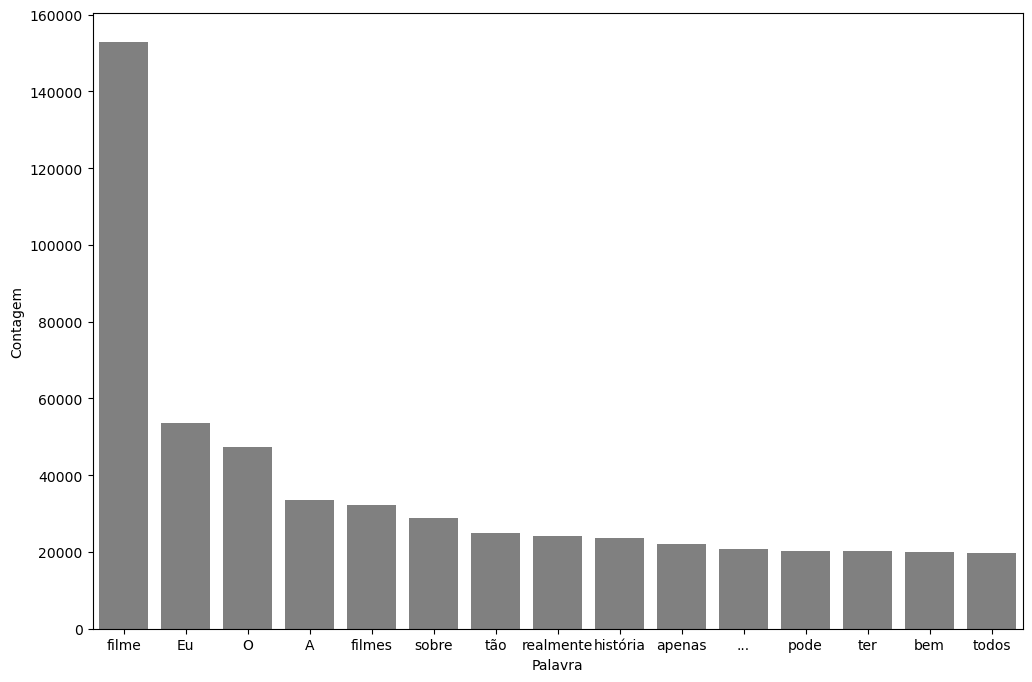

In [36]:
cria_pareto(resenha, "tratamento_2", 15)

In [37]:
token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao = list()

for ponto in punctuation:
    pontuacao.append(ponto)

In [38]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...'

In [39]:
#início de retirada de acentos
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [40]:
sem_acentos[1]

'Este exemplo motivo maioria filmes acao mesmos Generico chato nada valha pena assistir aqui Um completo desperdicio talentos Ice T Cubo Gelo mal aproveitados cada comprovando capazes atuar agir bem Nao incomode va ver New Jack City Ricochet assistir New York Undercover Ice T Boyz Hood Higher Learning Friday Ice Cube ver negocio real Ice Ts horrivelmente cliche dialogo sozinho faz filme ralar dentes ainda perguntando diabos Bill Paxton fazendo neste filme E diabos sempre interpreta exatamente personagem Dos extraterrestres diante todos filmes vi Bill Paxton fizeram interpretar exatamente personagem irritante menos Aliens personagem morreu tornou pouco gratificante ... No geral lixo acao segunda classe Existem incontaveis    filmes melhores ver realmente quiser ver filme assista Judgment Night praticamente copia carbono melhor atuacao roteiro melhor A unica coisa fez valer pena assistir mao decente camera cinematografia quase refrescante chega perto compensar horrivel filme si bem assim

In [41]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [42]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '.',
 '.',
 '.',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'f

In [43]:
#início de retirada dea acentos e pontuações
resenha["tratamento_3"] = sem_acentos

frase_processada = list()

for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

In [44]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
acuracia_tratamento3

0.6934896886372827

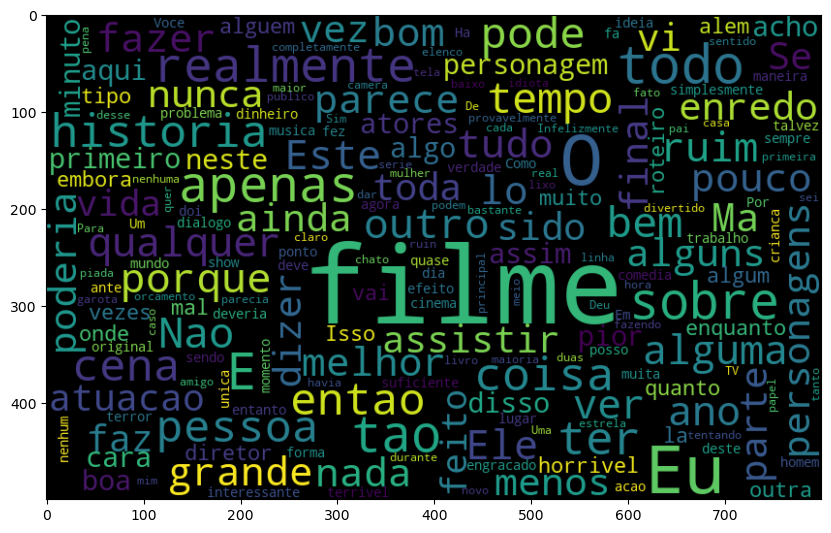

In [45]:
nuvem_palavras_neg(resenha, 'tratamento_3')

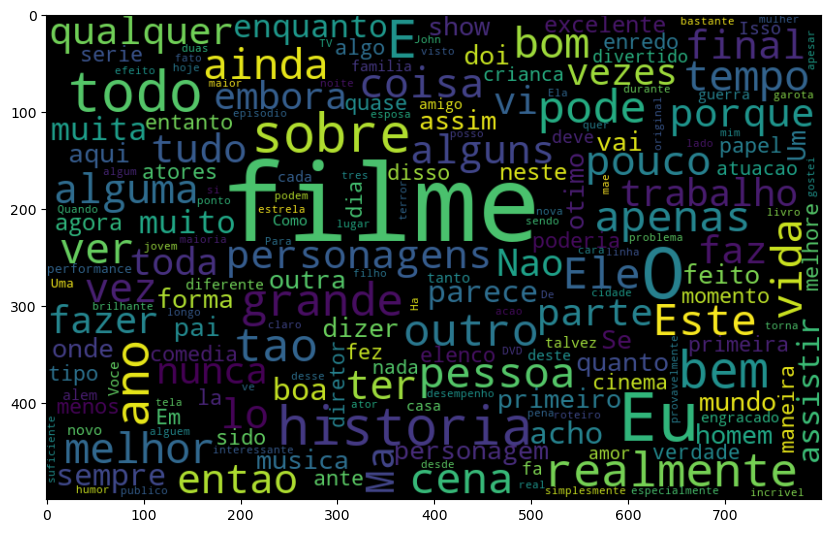

In [46]:
nuvem_palavras_pos(resenha, 'tratamento_3')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


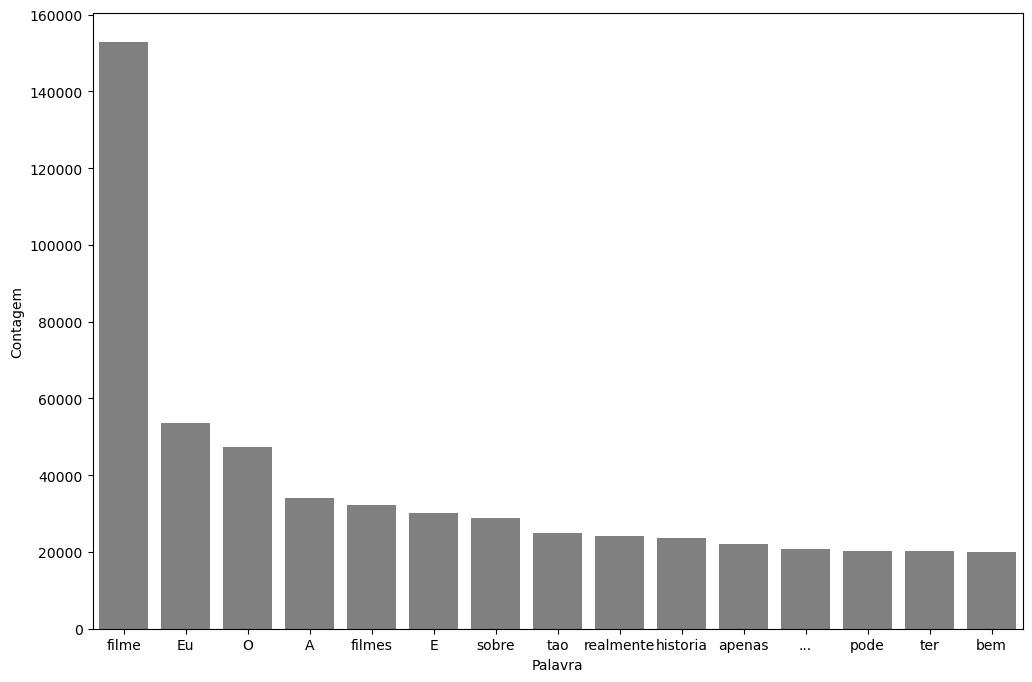

In [47]:
cria_pareto(resenha, "tratamento_3", 15)

In [48]:
#início de transformação de todos os dados para minúsculos
frase_processada = list()

for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

In [49]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
acuracia_tratamento4

0.6915689446016984

In [50]:
#início do passo de stemmização -> reduzir a um radical comum
stemmer = nltk.RSLPStemmer() #removedor de sufixos

frase_processada = list()

for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra)) #aqui
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_5"] = frase_processada


In [51]:
resenha

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...
...,...,...,...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...,Como media votos baixa fato funcionario locado...,media votos baixa fato funcionario locadora ac...,"med vot baix fat funcionari loc ach tud bem "",..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,enredo algumas reviravoltas infelizes inacredi...,enred algum reviravolt infeliz inacredita enta...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros med...,espantado forma filme maioria outros media 5 e...,espant form film maior outr med 5 estrel men f...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,christmas together realmente veio antes tempo ...,christm togeth real vei ant temp cri john denv...


In [52]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
acuracia_tratamento5

0.6970279013344116

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


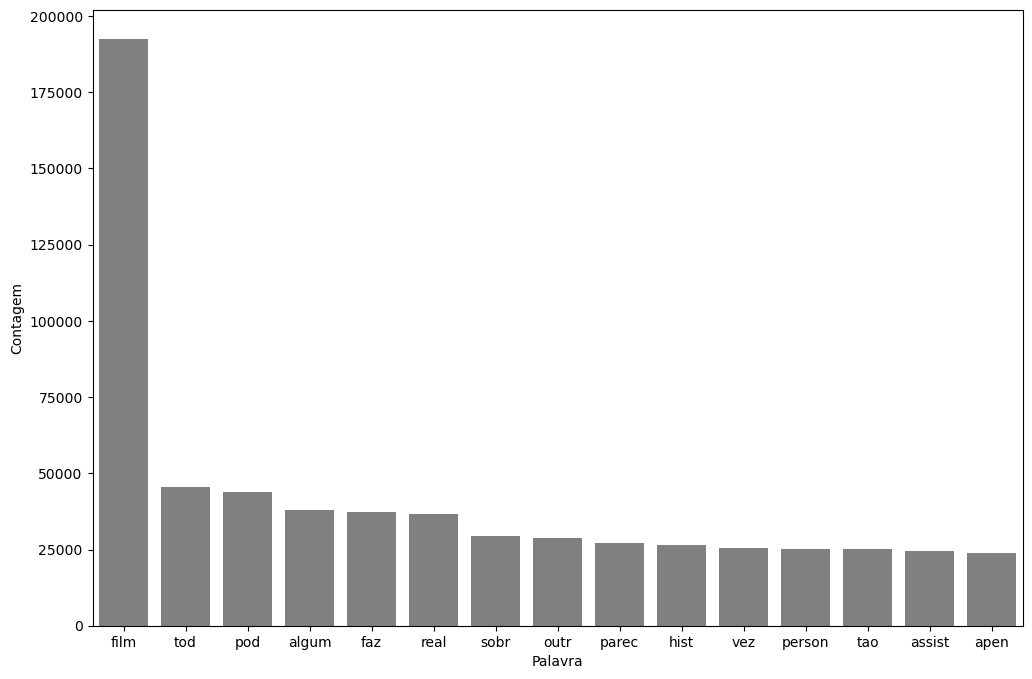

In [53]:
cria_pareto(resenha, "tratamento_5", 15)

In [59]:
#TF-IDF (Term Frequency-Inverse Document Frequency), ou Frequência dos Termos - Inverso da Frequência do Documento
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,resenha["classificacao"],random_state=42)
regressao_logistica = LogisticRegression(solver='lbfgs')
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto

0.6600889607763849

In [60]:
tfidf_tratado = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratado,resenha["classificacao"],random_state=42)
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratado = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratado

0.6963202587949858

In [61]:
#NGRAMS - bigramas -> sequência lógica (estrutura de sequência)
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) #sem limitar o máximo. vetor máximo
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"]) 
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,resenha["classificacao"],random_state=42)
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.8856449656287909

In [62]:
#análise de pesos
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,index = tfidf.get_feature_names())

pesos.nlargest(10,0) #perceba que as ngrams não foram relevantes pro resultado

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,9.905867
excel,9.008891
perfeit,6.899352
maravilh,6.287759
favorit,5.890861
incri,5.762412
divert,5.386778
brilh,4.857927
ador,4.575874
hoj,4.492856


In [63]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,index = tfidf.get_feature_names())

pesos.nsmallest(10,0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
ruim,-11.783097
pi,-11.462572
horri,-9.725881
terri,-8.404175
nad,-7.623792
chat,-7.517420
parec,-6.881815
nenhum,-6.380789
tent,-5.955771
mal,-5.712541
